In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats

pd.set_option('display.float_format', lambda x: '%.2f' %x)

olympics = pd.read_csv('/Users/luciomuramatsu/Google Drive/Code/python/DataScience/dataOlympics/olympics_events.csv')

In [4]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
olympics.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.00,180.00,80.00,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.00,170.00,60.00,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.00,nan,nan,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.00,nan,nan,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.00,185.00,82.00,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.00,185.00,82.00,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.00,185.00,82.00,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.00,185.00,82.00,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.00,185.00,82.00,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.00,185.00,82.00,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [6]:
olympics.describe()

,ID,Age,Height,Weight,Year
count,271116.00,261642.00,210945.00,208241.00,271116.00
mean,68248.95,25.56,175.34,70.70,1978.38
std,39022.29,6.39,10.52,14.35,29.88
min,1.00,10.00,127.00,25.00,1896.00
25%,34643.00,21.00,168.00,60.00,1960.00
50%,68205.00,24.00,175.00,70.00,1988.00
75%,102097.25,28.00,183.00,79.00,2002.00
max,135571.00,97.00,226.00,214.00,2016.00


In [7]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [8]:
pysqldf('''
SELECT 
    Sport,
    COUNT(Sport) Count
FROM olympics 
WHERE 
    Height IS NOT NULL
    AND
    Weight IS NOT NULL
    AND 
    Age IS NOT NULL
GROUP BY Sport
ORDER BY Count DESC
;
''')

,Sport,Count
0,Athletics,32374
1,Swimming,18776
2,Gymnastics,18271
3,Rowing,7790
4,Cycling,7775
5,Cross Country Skiing,7529
6,Shooting,7260
7,Fencing,6537
8,Alpine Skiing,6322
9,Canoeing,5550


In [9]:
swimming = pysqldf('''
SELECT 
    Name,
    Sex,
    Age,
    Height,
    Weight,
    Year,
    CASE 
        WHEN Medal = 'Bronze' THEN 1
        WHEN Medal = 'Silver' THEN 2
        WHEN Medal = 'Gold' THEN 3
        ELSE 0
        END AS Medal
FROM olympics 
WHERE 
    Sport = 'Swimming'
    AND
    Height IS NOT NULL
    AND
    Weight IS NOT NULL
    AND 
    Age IS NOT NULL
;
''')

In [10]:
pysqldf('''
SELECT 
    *
FROM swimming 
WHERE 
    Medal > 0
;
''')

,Name,Sex,Age,Height,Weight,Year,Medal
0,Reema Abdo,F,21.00,173.00,59.00,1984,1
1,Viktor Andreyevich Aboimov,M,22.00,190.00,78.00,1972,2
2,Viktor Andreyevich Aboimov,M,22.00,190.00,78.00,1972,1
3,"Matthew ""Matt"" Abood",M,30.00,197.00,92.00,2016,1
4,Gary Abraham,M,21.00,175.00,64.00,1980,1
...,...,...,...,...,...,...,...
2481,Iris Zscherpe,F,17.00,174.00,55.00,1984,1
2482,Martijn Hendrik Zuijdweg,M,23.00,186.00,83.00,2000,1
2483,Robertas ulpa,M,20.00,193.00,82.00,1980,3
2484,Anastasiya Valeryevna Zuyeva-Fesikova,F,22.00,182.00,71.00,2012,2


## Discriptive Stats

In [11]:
def discriptive_stats(table_name, column_name):
    print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
    print(" ")
    print(f"Table name: {table_name}")
    print(f"Column name: {column_name}")
    print(" ")
    print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
    
    count = pysqldf(f'''
        SELECT 
        "Count"                         as Stat,
        count({column_name})           as Value 
        FROM {table_name} 
    ''')
    
    mean = pysqldf(f'''
        SELECT 
        "Mean"                          as Stat,
        CAST(avg({column_name}) as int) as Value
        FROM {table_name} 
    ''')
    
    median = pysqldf(f'''
        SELECT  
        "Median"                       as Stat,
        {column_name}         as Value 
        FROM {table_name} 
        ORDER BY {column_name} 
        LIMIT 1 
        OFFSET (SELECT count({column_name}) FROM {table_name})/2
    ''')
    
    mode = pysqldf(f'''
        SELECT 
            {column_name} as Mode,
            COUNT(*)      as Freq
        FROM {table_name} 
        GROUP BY {column_name}
        ORDER BY COUNT(*) DESC
        LIMIT 5 
    ''')
    
    min = pysqldf(f'''
        SELECT 
            "Min"              as Stat,
            min({column_name}) as Value
        FROM {table_name}  
    ''')
    
    max = pysqldf(f'''
        SELECT 
            "Max"              as Stat,
            max({column_name}) as Value
        FROM {table_name}  
    ''')
    
    display(pd.concat([count, mean, median, min, max]).set_index('Stat'))
    display(mode.set_index('Mode'))

In [12]:
def get_irqs(table_name, column_name):
    print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
    print(f"Analysing column \"{column_name}\" from table \"{table_name}\"")
    print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
    
    irqs = pysqldf(f'''
        WITH 
        percent_tbl AS (
            SELECT {column_name},
            ntile(4) OVER (ORDER BY {column_name}) percent
            FROM {table_name}),
        p_25 AS (
            SELECT (percent * 0.25) as pct,
            last_value({column_name}) OVER (PARTITION BY percent) last_val
            FROM percent_tbl
            WHERE percent = 1 LIMIT 1
            ),
        p_50 AS (
            SELECT 
            (percent * 0.25) as pct,
            last_value({column_name}) OVER (PARTITION BY percent) last_val
            FROM percent_tbl
            WHERE percent = 2 LIMIT 1
            ),
        p_75 AS (
            SELECT 
            (percent * 0.25) as pct,
            last_value({column_name}) OVER (PARTITION BY percent) last_val
            FROM percent_tbl
            WHERE percent = 3 LIMIT 1
            ),
        p_100 AS (
            SELECT 
            (percent * 0.25) as pct,
            last_value({column_name}) OVER (PARTITION BY percent) last_val
            FROM percent_tbl
            WHERE percent = 4 LIMIT 1
            )
        SELECT * FROM p_25 UNION
        SELECT * FROM p_50 UNION
        SELECT * FROM p_75 UNION
        SELECT * FROM p_100
    ''')
    
    return display(pd.DataFrame(irqs))

In [13]:
for col in swimming.columns:
        try:
            discriptive_stats("swimming", col)
            get_irqs("swimming", col)
        except:
            print("Not possible")

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
 
Table name: swimming
Column name: Name
 
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


,Value
Stat,
Count,18776
Mean,0
Median,Kim Min-Seok
Min,"A. W. Nancy ""Nan"" Rae"
Max,va Risztov


,Freq
Mode,
"Michael Fred Phelps, II",30
Franziska van Almsick,23
Mette Jacobsen,20
"Wei Ling ""Joscelin"" Yeo",19
"Susan ""Susie"" O'Neill",19


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Analysing column "Name" from table "swimming"
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


,pct,last_val
0,0.25,Emiliano Brembilla
1,0.50,Kim Min-Seok
2,0.75,Przemysaw Staczyk
3,1.00,va Risztov


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
 
Table name: swimming
Column name: Sex
 
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


,Value
Stat,
Count,18776
Mean,0
Median,M
Min,F
Max,M


,Freq
Mode,
M,10321
F,8455


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Analysing column "Sex" from table "swimming"
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


,pct,last_val
0,0.25,F
1,0.50,M
2,0.75,M
3,1.00,M


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
 
Table name: swimming
Column name: Age
 
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


,Value
Stat,
Count,18776.00
Mean,20.00
Median,20.00
Min,11.00
Max,41.00


,Freq
Mode,
19.00,2053
21.00,1932
18.00,1889
20.00,1848
22.00,1712


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Analysing column "Age" from table "swimming"
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


,pct,last_val
0,0.25,18.00
1,0.50,20.00
2,0.75,23.00
3,1.00,41.00


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
 
Table name: swimming
Column name: Height
 
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


,Value
Stat,
Count,18776.00
Mean,178.00
Median,179.00
Min,138.00
Max,209.00


,Freq
Mode,
180.00,1050
170.00,930
185.00,905
178.00,839
183.00,809


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Analysing column "Height" from table "swimming"
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


,pct,last_val
0,0.25,171.00
1,0.50,179.00
2,0.75,186.00
3,1.00,209.00


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
 
Table name: swimming
Column name: Weight
 
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


,Value
Stat,
Count,18776.00
Mean,70.00
Median,70.00
Min,39.00
Max,114.00


,Freq
Mode,
70.00,854
75.00,819
60.00,807
80.00,720
68.00,633


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Analysing column "Weight" from table "swimming"
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


,pct,last_val
0,0.25,62.00
1,0.50,70.00
2,0.75,79.00
3,1.00,114.00


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
 
Table name: swimming
Column name: Year
 
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


,Value
Stat,
Count,18776
Mean,1991
Median,1992
Min,1900
Max,2016


,Freq
Mode,
2008,1722
2000,1715
2004,1610
1988,1560
2016,1532


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Analysing column "Year" from table "swimming"
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


,pct,last_val
0,0.25,1976
1,0.50,1992
2,0.75,2008
3,1.00,2016


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
 
Table name: swimming
Column name: Medal
 
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


,Value
Stat,
Count,18776
Mean,0
Median,0
Min,0
Max,3


,Freq
Mode,
0,16290
3,912
2,806
1,768


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Analysing column "Medal" from table "swimming"
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


,pct,last_val
0,0.25,0
1,0.50,0
2,0.75,0
3,1.00,3


In [14]:
plt.style.use('fivethirtyeight')

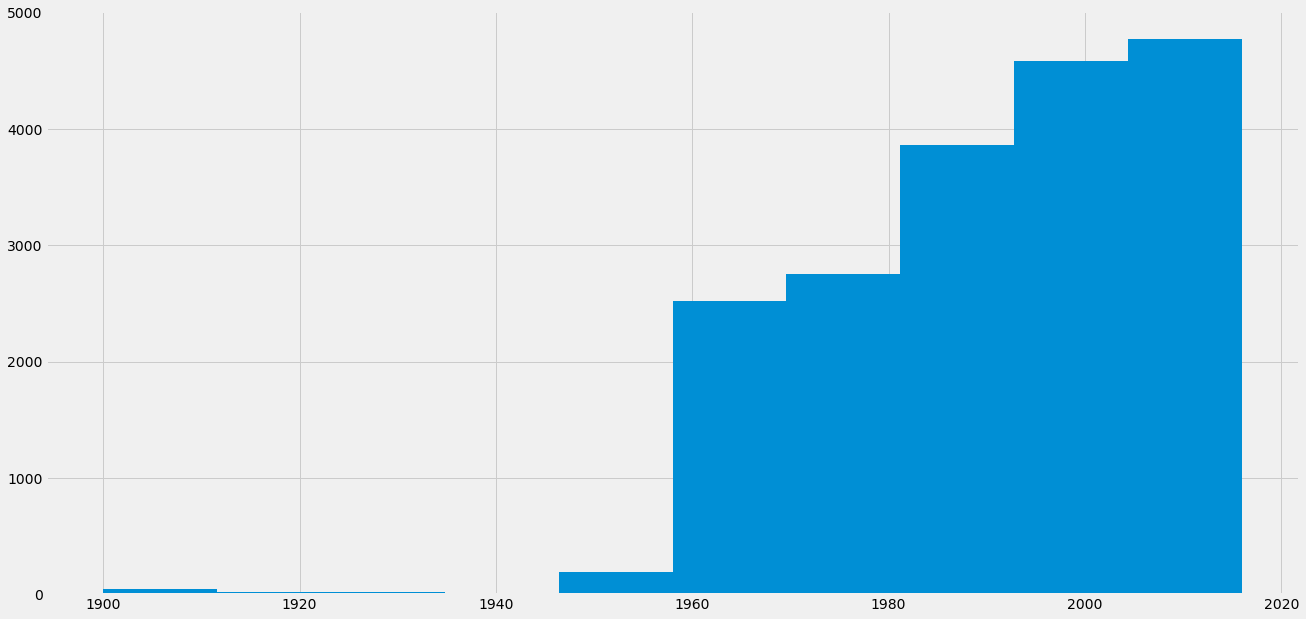

In [15]:
plt.figure(figsize=(20, 10))
swimming.Year.hist()

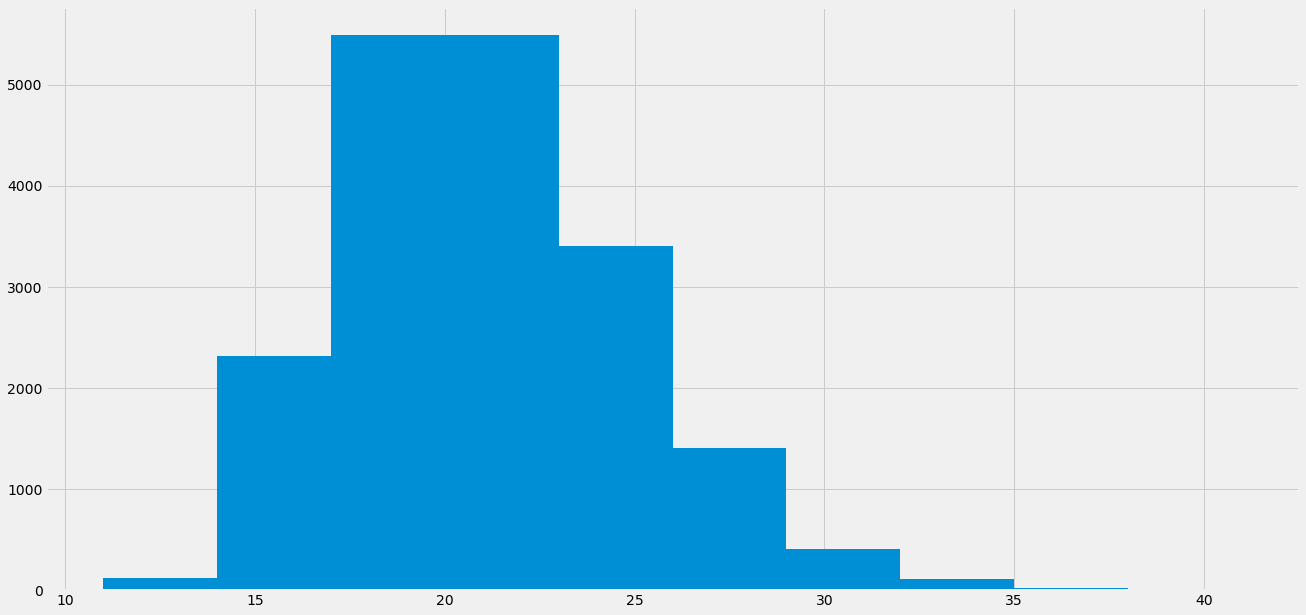

In [16]:
plt.figure(figsize=(20, 10))
swimming.Age.hist()

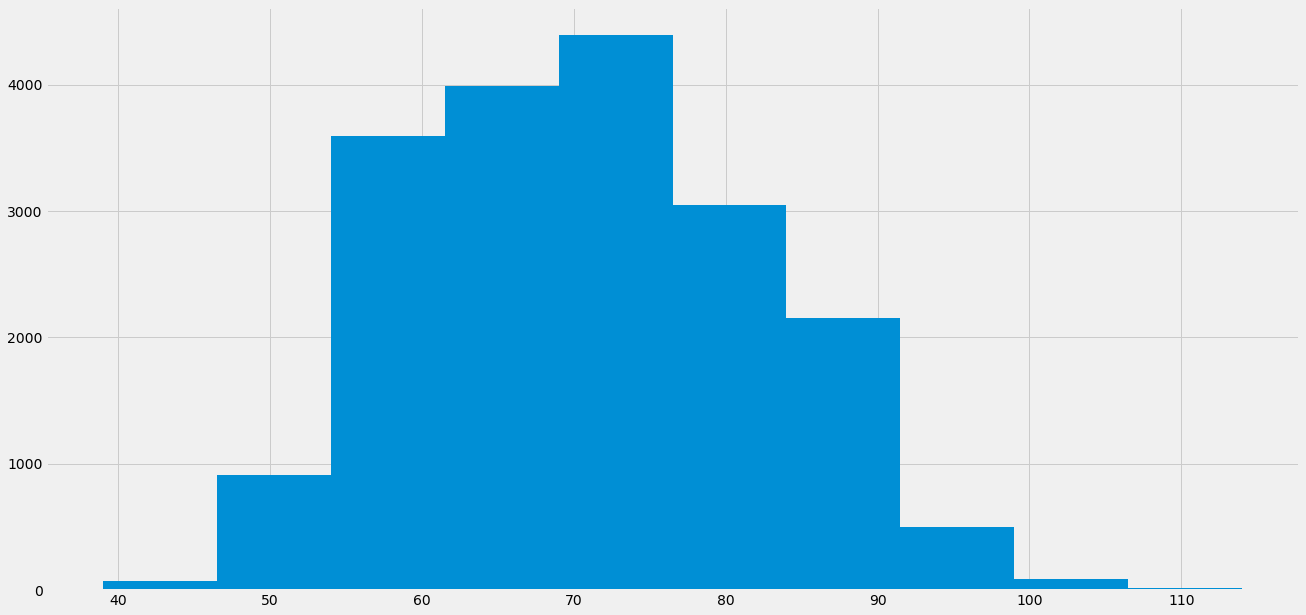

In [17]:
plt.figure(figsize=(20, 10))
swimming.Weight.hist()

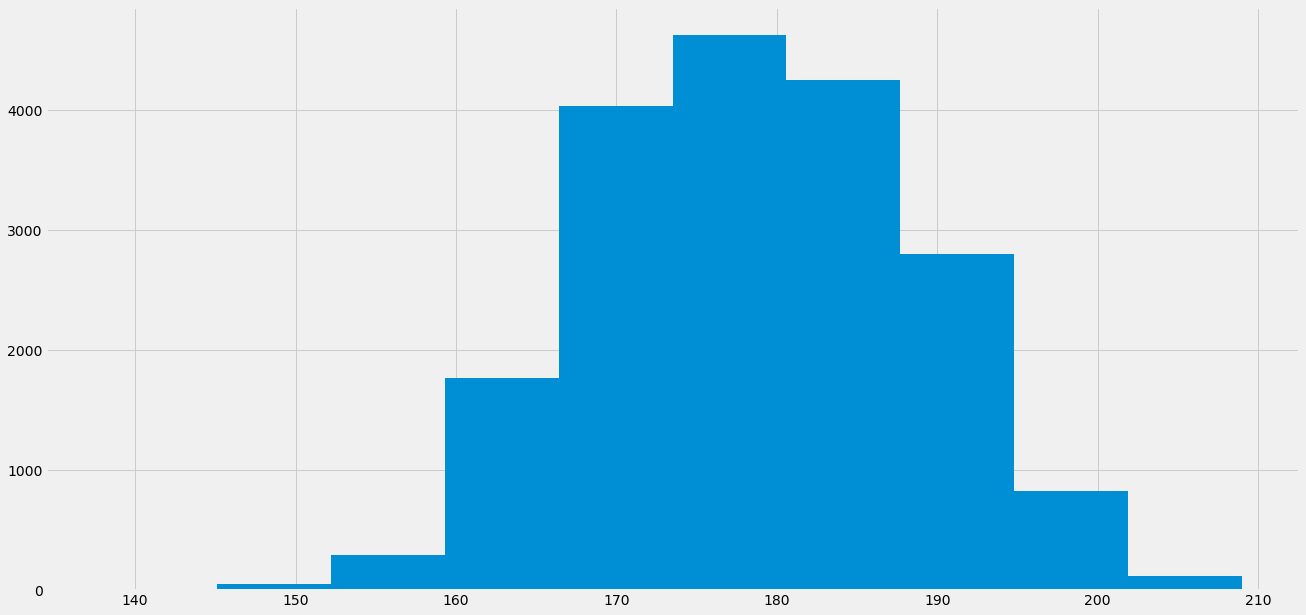

In [18]:
plt.figure(figsize=(20, 10))
swimming.Height.hist()

In [19]:
medal_height = pysqldf('''
SELECT 
    CASE 
        WHEN Medal = 1 THEN 1
        WHEN Medal = 'Silver' THEN 2
        WHEN Medal = 'Gold' THEN 3
        ELSE 0
        END AS Medal
FROM olympics 
WHERE 
    Sport = 'Swimming'
    AND
    Height IS NOT NULL
    AND
    Weight IS NOT NULL
    AND 
    Age IS NOT NULL
;
''')

In [20]:
s_noPlace = pd.DataFrame(swimming['Height'].loc[swimming['Medal'] == 0]).assign(Medal='No Place')
s_bronze = pd.DataFrame(swimming['Height'].loc[swimming['Medal'] == 1]).assign(Medal='Bronze')
s_silver = pd.DataFrame(swimming['Height'].loc[swimming['Medal'] == 2]).assign(Medal='Silver')
s_gold = pd.DataFrame(swimming['Height'].loc[swimming['Medal'] == 3]).assign(Medal='Gold')

In [21]:
cdf = pd.concat([s_noPlace, s_bronze, s_silver, s_gold])    
mdf = pd.melt(cdf, id_vars=['Medal'])
mdf.rename(columns={'Value':'Height'}) 
print(mdf.head())

      Medal variable  value
0  No Place   Height 194.00
1  No Place   Height 194.00
2  No Place   Height 194.00
3  No Place   Height 194.00
4  No Place   Height 194.00


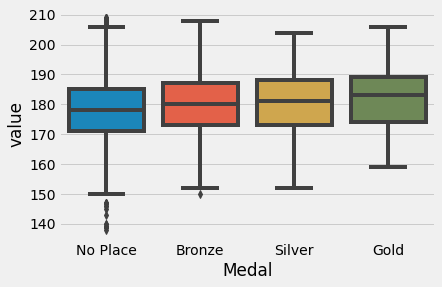

In [22]:
ax = sns.boxplot(x="Medal", y="value", data=mdf)    
plt.show()

In [23]:
swimming.describe()

,Age,Height,Weight,Year,Medal
count,18776.00,18776.00,18776.00,18776.00,18776.00
mean,20.62,178.60,70.60,1991.40,0.27
std,3.75,9.89,11.33,17.70,0.76
min,11.00,138.00,39.00,1900.00,0.00
25%,18.00,171.00,62.00,1976.00,0.00
50%,20.00,179.00,70.00,1992.00,0.00
75%,23.00,186.00,79.00,2008.00,0.00
max,41.00,209.00,114.00,2016.00,3.00


In [24]:
olympics[pd.isnull(olympics['Year'])]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal


In [25]:
competition = pysqldf('''
    SELECT 
        id as athlete_id,
        season,
        year,
        city,
        sport,
        event,
        medal,
        team
    FROM 
        olympics
    WHERE
        season = 'Summer'
        AND
        age IS NOT NULL
        AND
        weight IS NOT NULL
        AND
        height IS NOT NULL

''')

In [26]:
competition.head(15)
competition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166706 entries, 0 to 166705
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   athlete_id  166706 non-null  int64 
 1   Season      166706 non-null  object
 2   Year        166706 non-null  int64 
 3   City        166706 non-null  object
 4   Sport       166706 non-null  object
 5   Event       166706 non-null  object
 6   Medal       25341 non-null   object
 7   Team        166706 non-null  object
dtypes: int64(2), object(6)
memory usage: 10.2+ MB


In [27]:
athlete = pysqldf('''
    SELECT 
        DISTINCT id, 
        name
    FROM 
        olympics
    WHERE
        season = 'Summer'
        AND
        age IS NOT NULL
        AND
        weight IS NOT NULL
        AND
        height IS NOT NULL

''')

In [28]:
athlete.head(15)
athlete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85040 entries, 0 to 85039
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      85040 non-null  int64 
 1   Name    85040 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [29]:
body = pysqldf('''
    SELECT 
        DISTINCT id AS athlete_id, 
        sex,
        age,
        height,
        weight,
        weight / ((height/100)*(height/100)) AS BMI
    FROM 
        olympics
    WHERE
        season = 'Summer'
        AND
        age IS NOT NULL
        AND
        weight IS NOT NULL
        AND
        height IS NOT NULL

''')

In [30]:
body.head(15)


,athlete_id,Sex,Age,Height,Weight,BMI
0,1,M,24.00,180.00,80.00,24.69
1,2,M,23.00,170.00,60.00,20.76
2,12,M,31.00,172.00,70.00,23.66
3,13,F,30.00,159.00,55.50,21.95
4,13,F,34.00,159.00,55.50,21.95
5,17,M,28.00,175.00,64.00,20.90
6,17,M,32.00,175.00,64.00,20.90
7,18,M,31.00,189.00,130.00,36.39
8,22,F,22.00,170.00,125.00,43.25
9,23,M,22.00,187.00,89.00,25.45


Text(0, 0.5, 'Height (cm)')

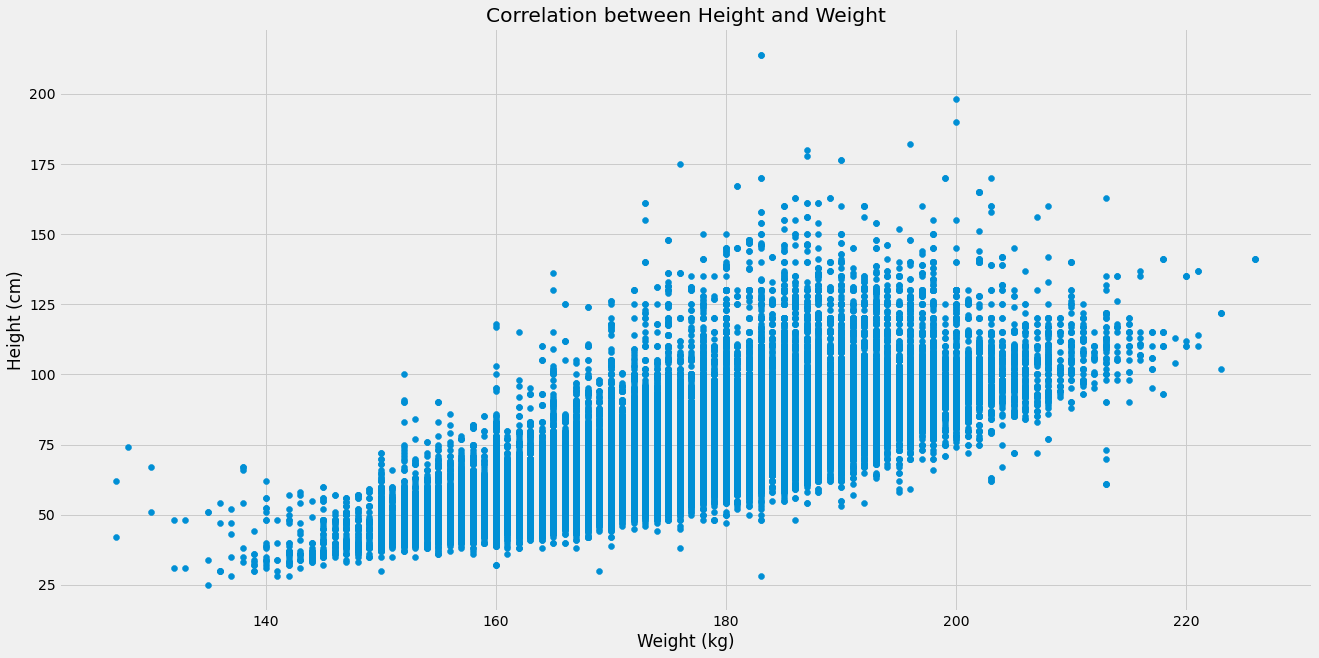

In [31]:
x_height = body['Height']
y_weight = body['Weight']
plt.figure(figsize=(20,10))
plt.scatter(x_height, y_weight)
plt.title('Correlation between Height and Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')

(array([1.6000e+01, 1.1152e+04, 8.8979e+04, 1.9101e+04, 2.5420e+03,
        5.5700e+02, 1.4000e+02, 1.8000e+01, 3.0000e+00, 2.0000e+00]),
 array([ 8.36095434, 13.91501687, 19.4690794 , 25.02314193, 30.57720446,
        36.13126698, 41.68532951, 47.23939204, 52.79345457, 58.3475171 ,
        63.90157962]),
 <a list of 10 Patch objects>)

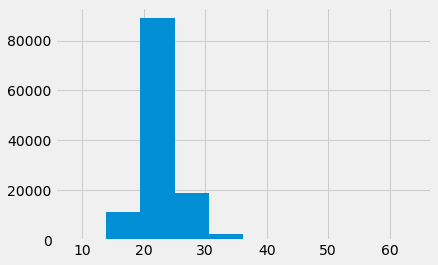

In [32]:
plt.hist(body['BMI'])

In [33]:
body.describe()

,athlete_id,Age,Height,Weight,BMI
count,122510.00,122510.00,122510.00,122510.00,122510.00
mean,68133.02,25.55,176.88,72.51,22.98
std,39202.86,5.50,10.64,15.14,3.16
min,1.00,11.00,127.00,25.00,8.36
25%,34138.75,22.00,170.00,62.00,20.99
50%,68644.00,25.00,177.00,71.00,22.66
75%,101911.50,28.00,184.00,81.00,24.41
max,135568.00,71.00,226.00,214.00,63.90


In [34]:
basketball_male = pysqldf('''
    SELECT 
        b.Age,
        b.Height,
        b.Weight,
        b.BMI,
        c.Year,
        c.Event,
        c.Team,
        c.Medal,
        CASE c.Medal
            WHEN "Bronze" THEN 1
            WHEN "Silver" THEN 2
            WHEN "Gold" THEN 3
            ELSE 0
            END Medal_Num,
        CASE c.Medal
            WHEN "Bronze" THEN 'Yes'
            WHEN "Silver" THEN 'Yes'
            WHEN "Gold" THEN 'Yes'
            ELSE 'No'
            END Medal_Y_N
    FROM
        body b
    JOIN
        competition c
    ON 
        b.athlete_id = c.athlete_id
    WHERE
        c.sport = "Basketball"
        AND
        b.sex = "M"
''')


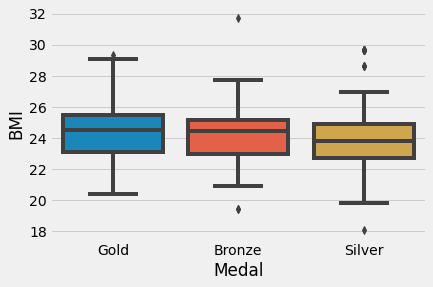

In [35]:
sns.boxplot(x = 'Medal', y = 'BMI', data = basketball_male)

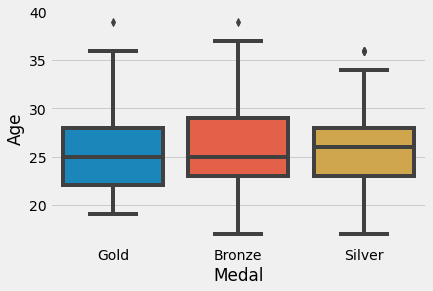

In [36]:
sns.boxplot(x = 'Medal', y = 'Age', data = basketball_male)

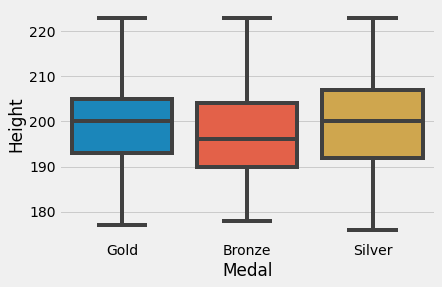

In [37]:
sns.boxplot(x = 'Medal', y = 'Height', data = basketball_male)

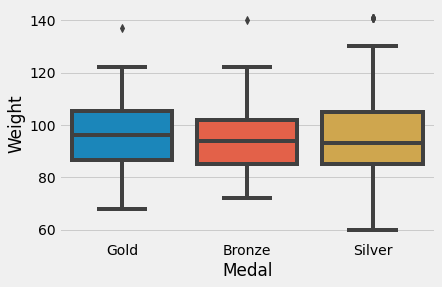

In [38]:
sns.boxplot(x = 'Medal', y = 'Weight', data = basketball_male)

Text(0, 0.5, 'Medal')

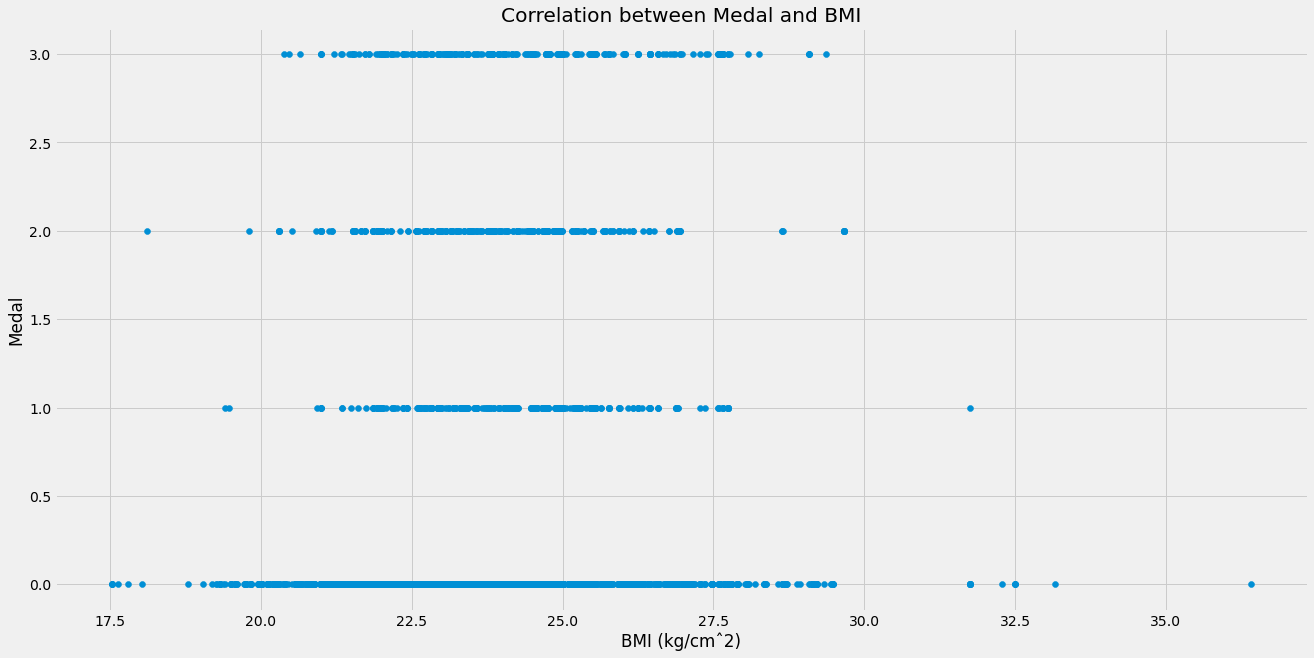

In [39]:
x_BMI = basketball_male['BMI']
y_medal = basketball_male['Medal_Num']
plt.figure(figsize=(20,10))
plt.scatter(x_BMI, y_medal)
plt.title('Correlation between Medal and BMI')
plt.xlabel('BMI (kg/cmˆ2)')
plt.ylabel('Medal')

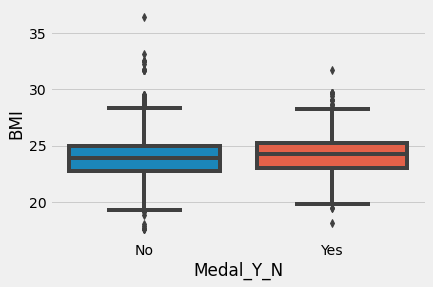

In [40]:
sns.boxplot(x = 'Medal_Y_N', y = 'BMI', data = basketball_male)

In [41]:
basketball_male

,Age,Height,Weight,BMI,Year,Event,Team,Medal,Medal_Num,Medal_Y_N
0,24.00,180.00,80.00,24.69,1992,Basketball Men's Basketball,China,None,0,No
1,29.00,195.00,85.00,22.35,2000,Basketball Men's Basketball,Italy,None,0,No
2,25.00,189.00,85.00,23.80,1972,Basketball Men's Basketball,Egypt,None,0,No
3,23.00,178.00,67.00,21.15,1984,Basketball Men's Basketball,Egypt,None,0,No
4,23.00,178.00,67.00,21.15,1988,Basketball Men's Basketball,Egypt,None,0,No
...,...,...,...,...,...,...,...,...,...,...
4340,20.00,201.00,100.00,24.75,1996,Basketball Men's Basketball,Lithuania,Bronze,1,Yes
4341,20.00,201.00,100.00,24.75,2004,Basketball Men's Basketball,Lithuania,None,0,No
4342,28.00,201.00,100.00,24.75,1996,Basketball Men's Basketball,Lithuania,Bronze,1,Yes
4343,28.00,201.00,100.00,24.75,2004,Basketball Men's Basketball,Lithuania,None,0,No


In [42]:
basket_redu = basketball_male[['BMI', 'Event', 'Medal_Num']]
basket_redu

,BMI,Event,Medal_Num
0,24.69,Basketball Men's Basketball,0
1,22.35,Basketball Men's Basketball,0
2,23.80,Basketball Men's Basketball,0
3,21.15,Basketball Men's Basketball,0
4,21.15,Basketball Men's Basketball,0
...,...,...,...
4340,24.75,Basketball Men's Basketball,1
4341,24.75,Basketball Men's Basketball,0
4342,24.75,Basketball Men's Basketball,1
4343,24.75,Basketball Men's Basketball,0


In [43]:
basket_grouped = basket_redu.groupby(['BMI', 'Event'], as_index = False).sum().sort_values(by=['Medal_Num'], ascending = False)
basket_grouped.head(15).describe()

,BMI,Medal_Num
count,15.00,15.00
mean,23.80,26.20
std,1.88,5.12
min,21.00,21.00
25%,22.67,23.00
50%,23.15,24.00
75%,24.88,28.50
max,27.66,40.00


In [44]:
basket_pivot = basket_grouped.pivot(index = 'BMI', columns = 'Event')
basket_pivot

,Medal_Num
Event,Basketball Men's Basketball
BMI,
17.53,0
17.63,0
17.80,0
18.02,0
18.11,2
...,...
31.75,1
32.28,0


In [45]:
athletics_male = pysqldf('''
    SELECT 
        b.Age,
        b.Height,
        b.Weight,
        b.BMI,
        CASE 
            WHEN b.BMI <= 20.72 THEN '1: < 20.72'
            WHEN b.BMI > 20.72 AND b.BMI <= 22.10 THEN '2: 20.72 - 22.10'
            WHEN b.BMI > 22.10 AND b.BMI <= 23.77 THEN '3: 22.10 - 23.77'
            ELSE '4: > 23.77'
            END BMI_Cat,
        c.Year,
        c.Event,
        c.Team,
        c.Medal,
        CASE c.Medal
            WHEN "Bronze" THEN 1
            WHEN "Silver" THEN 2
            WHEN "Gold" THEN 3
            ELSE 0
            END Medal_Num,
        CASE c.Medal
            WHEN "Bronze" THEN 'Yes'
            WHEN "Silver" THEN 'Yes'
            WHEN "Gold" THEN 'Yes'
            ELSE 'No'
            END Medal_Y_N
    FROM
        body b
    JOIN
        competition c
    ON 
        b.athlete_id = c.athlete_id
    WHERE
        c.sport = "Athletics"
        AND
        b.sex = "M"
''')

In [46]:
athletics_male.describe()

,Age,Height,Weight,BMI,Year,Medal_Num
count,38496.00,38496.00,38496.00,38496.00,38496.00,38496.00
mean,26.09,180.24,74.88,22.88,1979.14,0.26
std,4.68,8.22,16.13,3.53,28.74,0.75
min,13.00,150.00,42.00,14.51,1896.00,0.00
25%,23.00,175.00,65.00,20.72,1964.00,0.00
50%,25.00,180.00,72.00,22.10,1988.00,0.00
75%,29.00,186.00,80.00,23.77,2000.00,0.00
max,52.00,208.00,165.00,44.38,2016.00,3.00


In [47]:
athletics_redu = athletics_male[['BMI_Cat', 'Event', 'Medal_Num']]
athletics_grouped = athletics_redu.groupby(['BMI_Cat', 'Event'], as_index = False).sum()
athletics_pivot = athletics_grouped.pivot(index = 'BMI_Cat', columns = 'Event')

In [48]:
c_list = list(range(0,len(athletics_pivot.columns)-1))
c_list_BIG = list(filter(lambda x: (athletics_pivot.iloc[:, x].sum() > 100), c_list)) 

In [49]:
athletics_pivot = athletics_pivot.dropna(axis='columns')
athletics_pivot = athletics_pivot.iloc[:,c_list_BIG]

IndexError: positional indexers are out-of-bounds

In [ ]:
athletics_pivot

In [ ]:
plt.pcolor(athletics_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

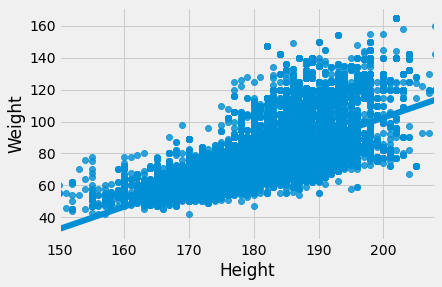

In [50]:
sns.regplot(x = 'Height', y = 'Weight', data = athletics_male)


In [51]:
from scipy import stats
pearson, p_value = stats.pearsonr(athletics_male['Height'], athletics_male['Weight'])
print(f'pearson = {pearson}')
print(f'p_value = {p_value}')
     

pearson = 0.7095643989809796
p_value = 0.0


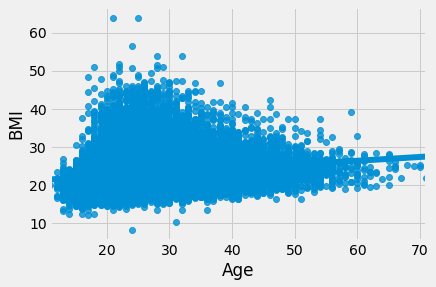

In [52]:
sns.regplot(x = 'Age', y = 'BMI', data = body)


In [53]:
pearson, p_value = stats.pearsonr(body['Age'], body['BMI'])
print(f'pearson = {pearson}')
print(f'p_value = {p_value}')
     

pearson = 0.17349742913808391
p_value = 0.0


In [54]:
basketball_male

,Age,Height,Weight,BMI,Year,Event,Team,Medal,Medal_Num,Medal_Y_N
0,24.00,180.00,80.00,24.69,1992,Basketball Men's Basketball,China,None,0,No
1,29.00,195.00,85.00,22.35,2000,Basketball Men's Basketball,Italy,None,0,No
2,25.00,189.00,85.00,23.80,1972,Basketball Men's Basketball,Egypt,None,0,No
3,23.00,178.00,67.00,21.15,1984,Basketball Men's Basketball,Egypt,None,0,No
4,23.00,178.00,67.00,21.15,1988,Basketball Men's Basketball,Egypt,None,0,No
...,...,...,...,...,...,...,...,...,...,...
4340,20.00,201.00,100.00,24.75,1996,Basketball Men's Basketball,Lithuania,Bronze,1,Yes
4341,20.00,201.00,100.00,24.75,2004,Basketball Men's Basketball,Lithuania,None,0,No
4342,28.00,201.00,100.00,24.75,1996,Basketball Men's Basketball,Lithuania,Bronze,1,Yes
4343,28.00,201.00,100.00,24.75,2004,Basketball Men's Basketball,Lithuania,None,0,No


In [55]:
basket_anova = basketball_male[['BMI', 'Medal']]

basket_anova_grouped = basket_anova.groupby(['Medal'])


In [58]:
basket_male_gold = basket_anova_grouped.get_group('Gold')['BMI']
basket_male_silver = basket_anova_grouped.get_group('Silver')['BMI']
basket_male_bronze = basket_anova_grouped.get_group('Bronze')['BMI']

# Shapiro-Wilk normality test 
stats.shapiro(basket_male_gold), stats.shapiro(basket_male_silver), stats.shapiro(basket_male_bronze)

In [60]:
# Levene variance test  
stats.levene(basket_male_gold, basket_male_silver, basket_male_bronze)

LeveneResult(statistic=3.695073751895288, pvalue=0.02515370215648101)

In [61]:
F, p = stats.f_oneway(basket_male_gold, basket_male_silver, basket_male_bronze)
print('F statistic = {:.4f}'.format(F))
print('p value = {:.4f}'.format(p))

F statistic = 8.1995
p value = 0.0003


In [62]:
basket_male_gold_label = pd.DataFrame(basket_male_gold.copy())
basket_male_gold_label['label'] = 'gold'
basket_male_silver_label = pd.DataFrame(basket_male_silver.copy())
basket_male_silver_label['label'] = 'silver'
basket_male_bronze_label = pd.DataFrame(basket_male_bronze.copy())
basket_male_bronze_label['label'] = 'bronze'

In [63]:
basket_male_all_label = pd.concat([basket_male_gold_label, basket_male_silver_label, basket_male_bronze_label])

In [64]:
import statsmodels.stats.multicomp as ml

mcobj = ml.MultiComparison(basket_male_all_label.BMI, basket_male_all_label.label)
out = mcobj.tukeyhsd(0.05) 

print(out)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
bronze   gold   0.1544 0.4466 -0.1439  0.4528  False
bronze silver  -0.3508 0.0138 -0.6433 -0.0583   True
  gold silver  -0.5052  0.001 -0.8073 -0.2031   True
----------------------------------------------------


## Linear Regression - Age predicting RMI

In [65]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

x_lm = body[['Weight', 'Height']]
y_lm = body['BMI']
lm.fit(x_lm, y_lm)
lm.score(x_lm, y_lm)

0.9819331294269559

In [66]:
Yhat = lm.predict(x_lm)
Yhat

lm.intercept_

lm.coef_

array([24.51505365, 20.83414412, 23.42421835, ..., 21.29357776,
       21.29357776, 23.36510945])

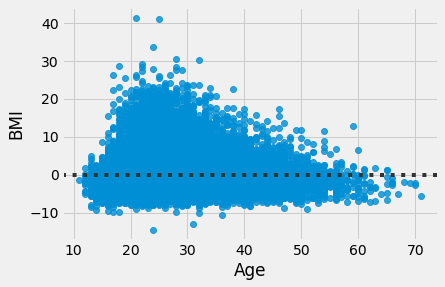

In [69]:
sns.residplot( body['Age'],  body['BMI'])

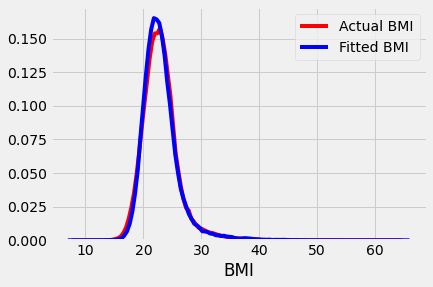

In [70]:
ax1 = sns.distplot(body['BMI'], hist = False, color = "r", label = "Actual BMI")
sns.distplot(Yhat, hist = False, color = "b", label = "Fitted BMI", ax=ax1)

In [71]:
x_pf = body['Age']
y_pf = body['BMI']

f = np.polyfit(x_pf, y_pf, 3)
p = np.poly1d(f)
print(p)

           3           2
0.0002016 x - 0.02346 x + 0.9187 x + 11.66


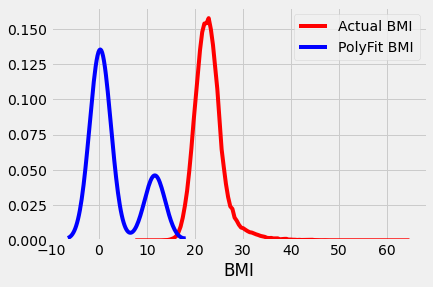

In [72]:
ax1 = sns.distplot(body['BMI'], hist = False, color = "r", label = "Actual BMI")
sns.distplot(p, hist = False, color = "b", label = "PolyFit BMI", ax=ax1)

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
scale = StandardScaler()
scale.fit(body[['Height', 'Weight']])
x_scale = scale.transform(body[['Height', 'Weight']])

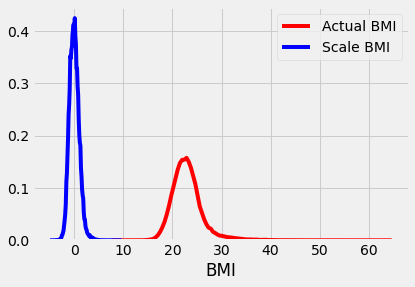

In [76]:
ax1 = sns.distplot(body['BMI'], hist = False, color = "r", label = "Actual BMI")
sns.distplot(x_scale, hist = False, color = "b", label = "Scale BMI", ax=ax1)

## Polynomial Fit

In [77]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [78]:
x = df['highway-mpg']
y = df['price']

NameError: name 'df' is not defined

In [ ]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

In [ ]:
PlotPolly(p, x, y, 'highway-mpg')

## Creating a pipeline

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [ ]:
input_pipe = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2)), ('mode', LinearRegression())]
pipe = Pipeline(input_pipe)

In [ ]:
pipe.fit(body[['Weight', 'Age']],body['BMI'])
yhat = pipe.predict(body[['Weight', 'Age']])

## Visual Evaluation of The Model

In [ ]:
ax1 = sns.distplot(body['BMI'], hist = False, color = "r", label = "Actual BMI")
sns.distplot(yhat, hist = False, color = "b", label = "Pipe BMI", ax=ax1)

## Numerical Evaluation of the Model

#### Mean Squared Error (MSE)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
MSE = mean_squared_error(body['BMI'], yhat)
print('Mean Squared Error is {:.4f}'.format(MSE))

## R squared (Rˆ2) Coefficient of Determination

In [ ]:
lm = LinearRegression()

x_lm = body[['Weight', 'Age']]
y_lm = body['BMI']
lm.fit(x_lm, y_lm)
lm.score(x_lm, y_lm)

In [ ]:
from sklearn.metrics import r2_score
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

#### Correlations Table

In [ ]:
body[['Weight', 'Height', 'BMI']].corr()

In [ ]:
this = np.array([60.0, 30.0]).reshape(-1,1)

In [ ]:
this.shape

In [79]:
athletics_male1960 = athletics_male[athletics_male['Year'] > 1960]

In [80]:
athletics_male1960_medal = athletics_male1960[athletics_male1960['Medal_Num'] > 0]
athletics_male1960_medal.describe()

,Age,Height,Weight,BMI,Year,Medal_Num
count,2933.00,2933.00,2933.00,2933.00,2933.00,2933.00
mean,26.31,183.00,79.61,23.57,1991.06,2.02
std,4.69,8.25,18.41,4.04,15.72,0.82
min,16.00,158.00,45.00,16.33,1964.00,1.00
25%,23.00,178.00,68.00,20.90,1976.00,1.00
50%,26.00,183.00,76.00,22.64,1992.00,2.00
75%,29.00,188.00,84.00,24.57,2004.00,3.00
max,42.00,207.00,154.00,44.38,2016.00,3.00


In [81]:
athletics_male_grouped = athletics_male1960.groupby(['Year'])

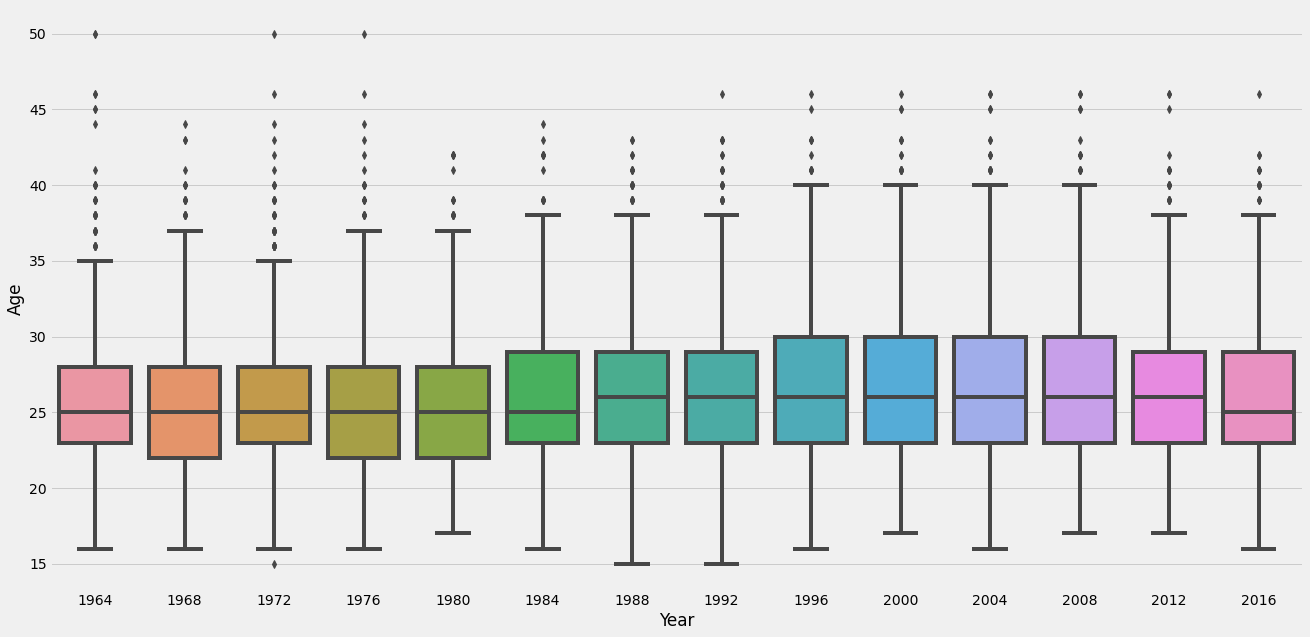

In [82]:
plt.figure(figsize=(20,10))
sns.boxplot(x = 'Year', y = 'Age', data = athletics_male1960)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

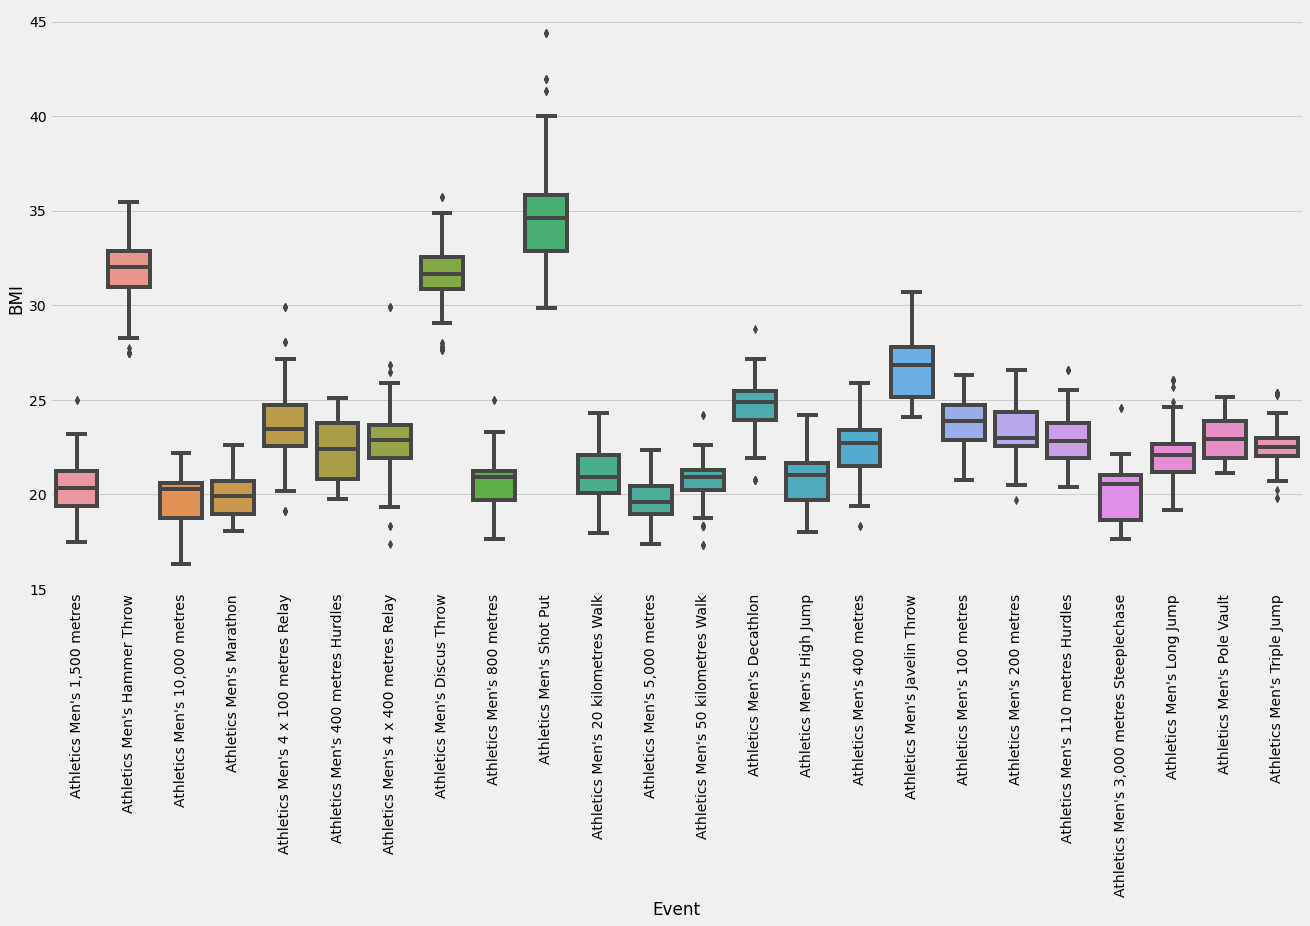

In [83]:
plt.figure(figsize=(20,10))
sns.boxplot(x = 'Event', y = 'BMI', data = athletics_male1960_medal)
plt.xticks(rotation=90)

In [84]:
judo_male = pysqldf('''
    SELECT 
        b.Age,
        b.Height,
        b.Weight,
        b.BMI,
        CASE 
            WHEN b.BMI <= 20.72 THEN '1: < 20.72'
            WHEN b.BMI > 20.72 AND b.BMI <= 22.10 THEN '2: 20.72 - 22.10'
            WHEN b.BMI > 22.10 AND b.BMI <= 23.77 THEN '3: 22.10 - 23.77'
            ELSE '4: > 23.77'
            END BMI_Cat,
        c.Year,
        c.Event,
        c.Team,
        c.Medal,
        CASE c.Medal
            WHEN "Bronze" THEN 1
            WHEN "Silver" THEN 2
            WHEN "Gold" THEN 3
            ELSE 0
            END Medal_Num,
        CASE c.Medal
            WHEN "Bronze" THEN 'Yes'
            WHEN "Silver" THEN 'Yes'
            WHEN "Gold" THEN 'Yes'
            ELSE 'No'
            END Medal_Y_N
    FROM
        body b
    JOIN
        competition c
    ON 
        b.athlete_id = c.athlete_id
    WHERE
        c.sport = "Judo"
        AND
        b.sex = "M"
''')

In [85]:
judo_male1960 = judo_male[judo_male['Year'] > 1960]
judo_male_grouped = judo_male1960.groupby(['Year'])
judo_male1960_medal = judo_male1960[judo_male1960['Medal_Num'] > 0]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

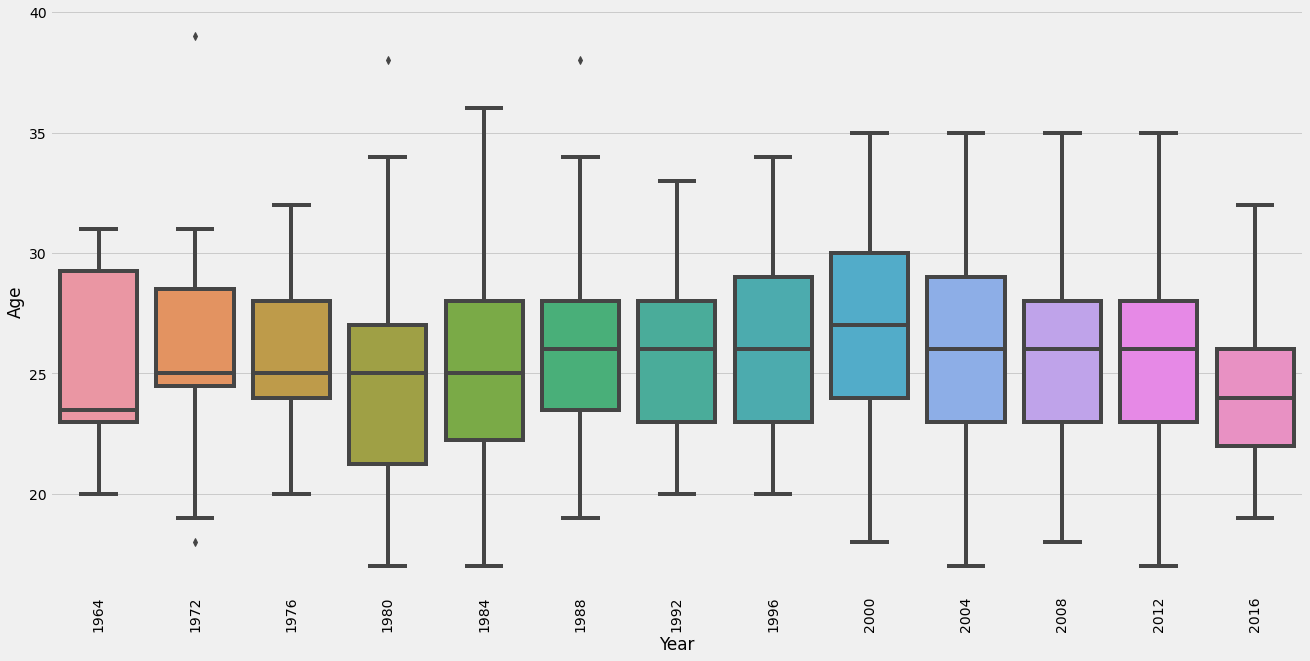

In [86]:
plt.figure(figsize=(20,10))
sns.boxplot(x = 'Year', y = 'Age', data = judo_male1960_medal)
plt.xticks(rotation=90)

In [87]:
swimming_male = pysqldf('''
    SELECT 
        b.Age,
        b.Height,
        b.Weight,
        b.BMI,
        CASE 
            WHEN b.BMI <= 20.72 THEN '1: < 20.72'
            WHEN b.BMI > 20.72 AND b.BMI <= 22.10 THEN '2: 20.72 - 22.10'
            WHEN b.BMI > 22.10 AND b.BMI <= 23.77 THEN '3: 22.10 - 23.77'
            ELSE '4: > 23.77'
            END BMI_Cat,
        c.Year,
        c.Event,
        c.Team,
        c.Medal,
        CASE c.Medal
            WHEN "Bronze" THEN 1
            WHEN "Silver" THEN 2
            WHEN "Gold" THEN 3
            ELSE 0
            END Medal_Num,
        CASE c.Medal
            WHEN "Bronze" THEN 'Yes'
            WHEN "Silver" THEN 'Yes'
            WHEN "Gold" THEN 'Yes'
            ELSE 'No'
            END Medal_Y_N
    FROM
        body b
    JOIN
        competition c
    ON 
        b.athlete_id = c.athlete_id
    WHERE
        c.sport = "Swimming"
        AND
        b.sex = "M"
''')

In [88]:
swimming_male1960 = swimming_male[swimming_male['Year'] > 1960]
swimming_male_grouped = swimming_male1960.groupby(['Year'])
swimming_male1960_medal = swimming_male1960[swimming_male1960['Medal_Num'] > 0]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

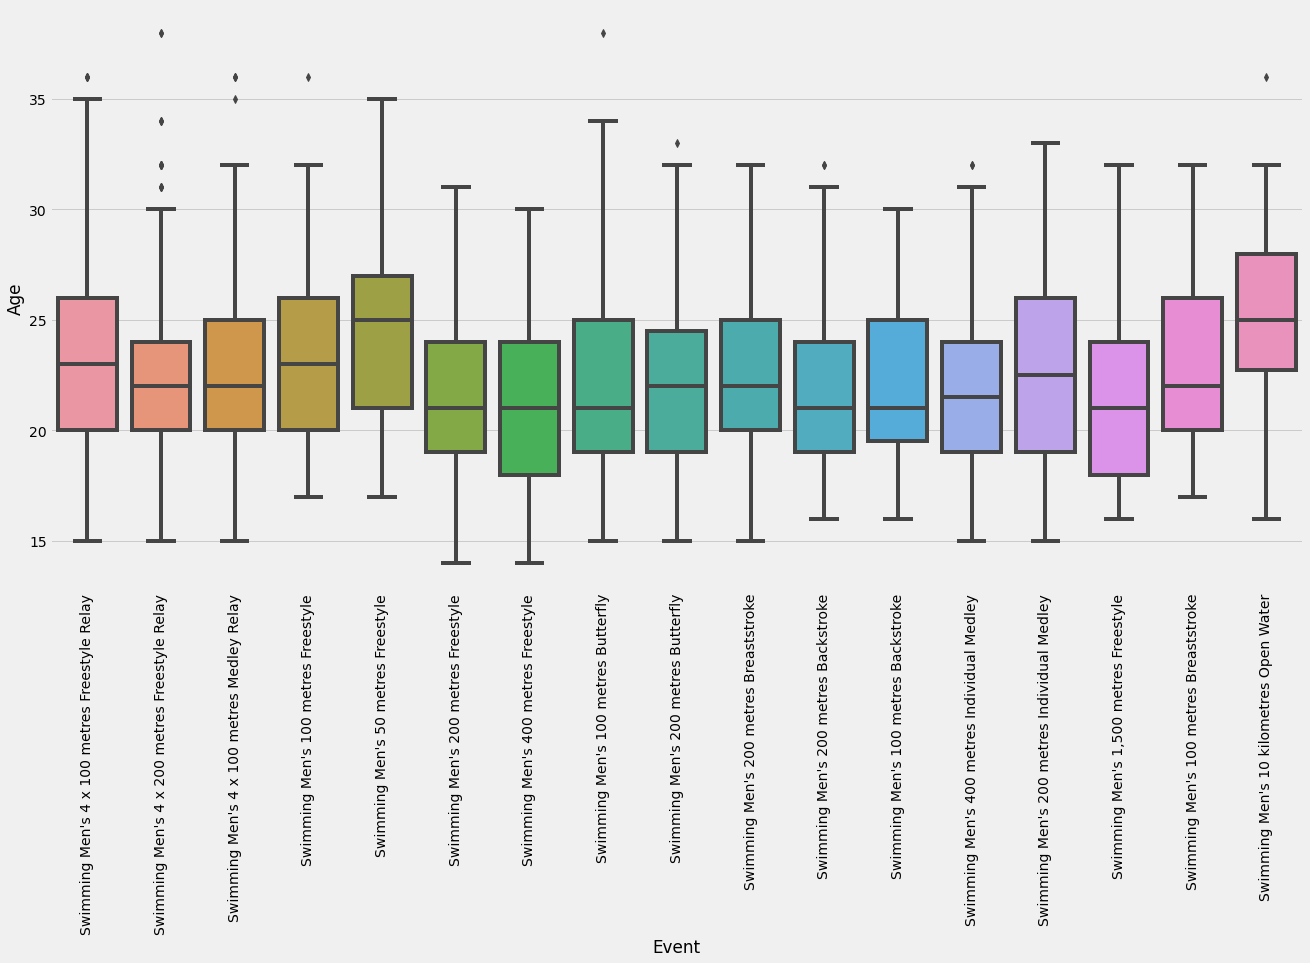

In [93]:
plt.figure(figsize=(20,10))
sns.boxplot(x = 'Event', y = 'Age', data = swimming_male1960_medal)
plt.xticks(rotation=90)

# Last Part IBM

In [90]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [91]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [92]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

NameError: name 'x_data' is not defined

In [ ]:
top_teams = pysqldf('''
    SELECT 
        Year,
        Team,
        Medal,
        COUNT(*) AS Number
    FROM
        competition
    WHERE
        (medal = 'Gold'
        OR
        medal = 'Silver'
        OR
        medal = 'Bronze')
        AND 
        year = 2016
    GROUP BY
        Year,
        Team,
        Medal
    ORDER BY
        Number DESC
''')

In [ ]:
top_teams